In [4]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Importing feature engineered dataset
stroke_data = pd.read_csv(r"C:\Users\asharm\Desktop\DAX-DS-Assignment-2022-Ashish_Sharma\venv\FeatureEngineered_StrokesDataset.csv")
stroke_data.head(5)

,Unnamed: 0,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,...,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_heart_patient,age_range
0,0,9046,1.051434,0,1,2.706375,1.147852,1,0,1,...,0,0,0,1,0,1,0,0,0,bin-1
1,1,51676,0.786070,0,0,2.121559,-0.063868,1,1,0,...,1,0,1,0,0,0,1,0,0,NaN
2,2,31112,1.626390,0,1,-0.005028,0.563375,1,0,1,...,0,0,1,0,0,0,1,0,0,bin-1
3,3,60182,0.255342,0,0,1.437358,0.834230,1,1,0,...,0,0,0,1,0,0,0,1,0,NaN
4,4,1665,1.582163,1,0,1.501184,-0.648345,1,1,0,...,1,0,1,0,0,0,1,0,0,bin-1


In [6]:
# dropping the age_range feature
stroke_data = stroke_data.drop(['age_range'], axis = 1)

In [7]:
stroke_data

,Unnamed: 0,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_heart_patient
0,0,9046,1.051434,0,1,2.706375,1.147852,1,0,1,...,1,0,0,0,1,0,1,0,0,0
1,1,51676,0.786070,0,0,2.121559,-0.063868,1,1,0,...,0,1,0,1,0,0,0,1,0,0
2,2,31112,1.626390,0,1,-0.005028,0.563375,1,0,1,...,1,0,0,1,0,0,0,1,0,0
3,3,60182,0.255342,0,0,1.437358,0.834230,1,1,0,...,1,0,0,0,1,0,0,0,1,0
4,4,1665,1.582163,1,0,1.501184,-0.648345,1,1,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,5105,18234,1.626390,1,0,-0.494658,-0.063868,0,1,0,...,1,0,0,0,1,0,0,1,0,0
5106,5106,44873,1.670617,0,0,0.420775,1.632540,0,1,0,...,0,1,0,0,1,0,0,1,0,0
5107,5107,19723,-0.363842,0,0,-0.511443,0.292520,0,1,0,...,0,1,0,1,0,0,0,1,0,0
5108,5108,37544,0.343796,0,0,1.328257,-0.420256,0,0,1,...,1,0,0,1,0,0,1,0,0,0


Text(0.5, 1.0, 'Patients rate of stroke')

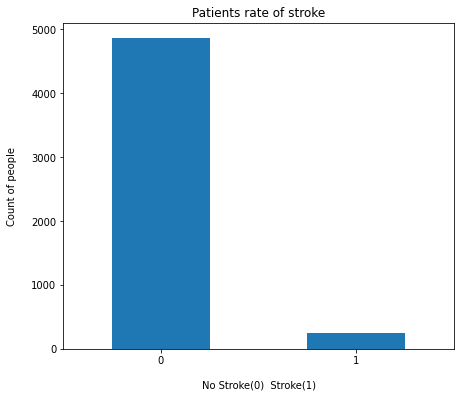

In [8]:
# Plotting for class imbalance
stroke_data['stroke'].value_counts().plot(kind = 'bar', figsize = (7,6), rot = 0)
plt.xlabel("No Stroke(0)  Stroke(1)", labelpad = 14)
plt.ylabel("Count of people", labelpad = 14)
plt.title("Patients rate of stroke")

In [9]:
stroke_data.drop(columns=['Unnamed: 0','id'],inplace=True)

In [10]:
xtrain = stroke_data.drop(columns=['stroke'])
labels = stroke_data["stroke"]

In [11]:
import imblearn

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
xtrain, labels = smote.fit_resample(xtrain, labels)

In [13]:
# Splitting dataset into train, test, cv
from sklearn.model_selection import train_test_split

x, x_test, y, y_test = train_test_split(xtrain,labels,test_size=0.2,train_size=0.8)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)


In [95]:
y_test.value_counts()

1    1001
0     944
Name: stroke, dtype: int64

In [96]:
y_train.value_counts()

1    2921
0    2911
Name: stroke, dtype: int64

Performing oversampling for avoiding baising the model 

In [97]:
# dataset balanced
y_train.value_counts()

1    2921
0    2911
Name: stroke, dtype: int64

Logistic Regression is choosen because it is binary classification problem and the dimentionality of the feature vector is also low

In [98]:
# Training base logistic regression model
from sklearn.linear_model import LogisticRegression
lr_basemodel =LogisticRegression()
lr_basemodel.fit(x_train,y_train)

LogisticRegression()

In [99]:
importance = lr_basemodel.coef_
importance

array([[ 2.00920582, -1.12565971, -0.80053465,  0.13423134, -0.02708576,
        -3.57470398, -3.64607859, -0.36996436, -4.14624863, -3.07226475,
        -4.32975951, -0.77138871, -3.22090864, -4.10055679, -1.46361346,
        -4.17146267, -4.09525502, -4.27830545, -3.64583117, -4.00651913,
        -4.03345331,  0.        ]])

In [100]:
# Predicting against cross validation dataset
y_pred_cv = lr_basemodel.predict(x_cv)

In [101]:
# Predicting against cross validation dataset
y_pred_test = lr_basemodel.predict(x_test)

In [102]:
from sklearn.metrics import f1_score, accuracy_score
print("f1 score for base model is : " , f1_score(y_cv,y_pred_cv))
print("f1 score for base model is : " , accuracy_score(y_cv,y_pred_cv))

f1 score for base model is :  0.8620504562533549
f1 score for base model is :  0.867866323907455


In [103]:
x_test.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'hypertension_heart_patient'],
      dtype='object')

In [104]:
# x_cv.stroke

In [105]:
from sklearn.metrics import f1_score, accuracy_score
print("f1 score for base model is : " , f1_score(y_test,y_pred_test))
print("Accuracy for base model : " , accuracy_score(y_test,y_pred_test))

f1 score for base model is :  0.8555327868852458
Accuracy for base model :  0.855012853470437


<AxesSubplot:>

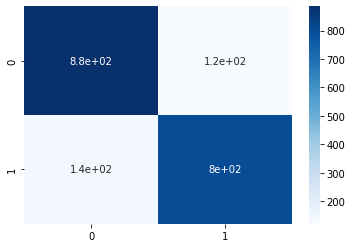

In [106]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_cv, y_pred_cv)
ax1 = plt.subplot()
sns.heatmap(cm, annot = True, cmap = 'Blues', ax = ax1)

In [107]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [108]:
from sklearn.model_selection import StratifiedKFold
lr=LogisticRegression()
param= {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1', 'l2']}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= lr,param_grid=param,scoring="f1",cv=folds,return_train_score=True)
#train model to learn relationships between x and y
model.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 15, 20],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='f1')

In [109]:
print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.8583940294700246
Best hyperparameters:  {'C': 10, 'penalty': 'l2'}


In [127]:
lr2=LogisticRegression(C=10,penalty="l2")
lr2.fit(x_train,y_train)

LogisticRegression(C=10)

In [128]:
y_pred_cv = lr2.predict(x_cv)

In [129]:
y_pred_test = lr2.predict(x_test)

In [130]:
from sklearn.metrics import f1_score
print("f1 score for base model is : " , f1_score(y_cv,y_pred_cv))

f1 score for base model is :  0.8656233135456017


<AxesSubplot:>

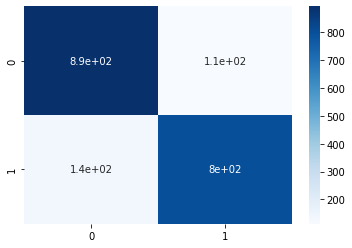

In [131]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_cv, y_pred_cv)
ax1 = plt.subplot()
sns.heatmap(cm, annot = True, cmap = 'Blues', ax = ax1)

In [132]:
# Results on test data

In [133]:
y_pred_test = lr2.predict(x_test)

In [134]:
from sklearn.metrics import f1_score
print("f1 score for base model is : " , f1_score(y_test,y_pred_test))

f1 score for base model is :  0.8518134715025907


<AxesSubplot:>

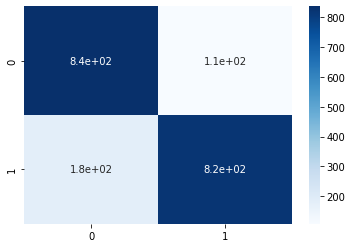

In [135]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
ax1 = plt.subplot()
sns.heatmap(cm, annot = True, cmap = 'Blues', ax = ax1)

Random Forest Classifier

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
clf=RandomForestClassifier(n_estimators=100)

In [145]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [146]:
y_pred=clf.predict(x_test)

In [147]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9516709511568123


In [148]:
from sklearn.metrics import f1_score
print("f1 score for base model is : " , f1_score(y_test,y_pred))

f1 score for base model is :  0.9537401574803149


<AxesSubplot:>

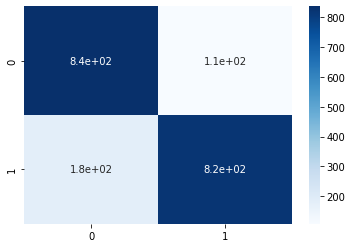

In [149]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
ax1 = plt.subplot()
sns.heatmap(cm, annot = True, cmap = 'Blues', ax = ax1)

Hyper Parameter tuning for random forest Classifier

In [151]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [153]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [154]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

In [157]:
clf=RandomForestClassifier(n_estimators=800, min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 90,
 bootstrap= False)

In [158]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=90, min_samples_split=5,
                       n_estimators=800)

In [159]:
y_pred=clf.predict(x_test)

In [160]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9496143958868895


In [161]:
from sklearn.metrics import f1_score
print("f1 score for base model is : " , f1_score(y_test,y_pred))

f1 score for base model is :  0.9510978043912175


In [163]:
#XGBOOST CLASSIFIER

In [169]:
pip install xgboost

  Using cached xgboost-1.6.1-py3-none-win_amd64.whl (125.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import xgboost as xgb

In [2]:
classifier = xgb.XGBClassifier()

In [14]:
classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [16]:
y_cv_pred = classifier.predict(x_cv)

In [17]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_cv, y_cv_pred))

Accuracy: 0.954241645244216


In [18]:
from sklearn.metrics import f1_score
print("f1 score for base model is : " , f1_score(y_cv,y_cv_pred))

f1 score for base model is :  0.9555666500249625


In [19]:
import pickle

In [20]:
pickle.dump(classifier, open('xgbClassifier.pkl', 'wb'))

In [21]:
pickled_model = pickle.load(open('xgbClassifier.pkl', 'rb'))
y_pred_test = pickled_model.predict(x_test)

In [22]:
print("f1 score for base model is : " , f1_score(y_test,y_pred_test))

f1 score for base model is :  0.9528112449799196


In [24]:
x_test['y_pred_test']= y_pred_test.tolist()

In [25]:
x_test.to_csv('Predicted_Stroke_csv_final.csv')